Pandas
======

<a id="1"></a>
1: Index
---------

- [1: Index](#1)
- [2: Summary](#2)
- [3: Series](#3)
- [4: DataFrames](#4)
- [5: CSV](#5)

<a id="2"></a>
2: Summary
----------

- Pandas is built on top of numpy
- It allows more sophisticated *Series* (like a dict) 
  and *Data Frame* (like a table) objects
- the datatype of the contained data is a NumPy.Scalar (e.g., float64)

<a id="3"></a>
3: Series
----------

In [1]:
import numpy as np
import pandas as pd

### 3.1: Create from a dict ###

- Use the `Series` constructor (accepts any dict-like object)
- Can also take a data iterable (plus an optional same-length iterable
  representing data labels)

In [2]:
test_balance_data = {
    'alice': 20.00,
    'bob': 20.18,
    'carol': 1.05,
    'dan': 42.42,
}
balances = pd.Series(test_balance_data)
balances

alice    20.00
bob      20.18
carol     1.05
dan      42.42
dtype: float64

In [3]:
values = list(test_balance_data.values())
unlabeled_balances = pd.Series(values)
unlabeled_balances

0    20.00
1    20.18
2     1.05
3    42.42
dtype: float64

In [4]:
labels = list(test_balance_data.keys())
unlabeled_balances = pd.Series(values, index=labels)
unlabeled_balances

alice    20.00
bob      20.18
carol     1.05
dan      42.42
dtype: float64

### 3.2: Accessing Data ###

- by index (aka `.iloc`)
- by label (if labelled) (aka `.loc`)
- like a dict (`.items()`, `.keys()`) **but note `.values` 
  NOT `.values()`**
- with dot notation (as long as label meets variable naming constraints)
- by slice (but note slicing with labels is inclusive)

In [5]:
# Optional import to use markdown-formatted output
from IPython.display import display, Markdown

def render(md):
    return display(Markdown(md))

In [6]:
print( balances[0] )
print( type(balances[0]) )
print( balances[-1] )
print( balances.iloc[0] )

20.0
<class 'numpy.float64'>
42.42
20.0


In [7]:
print( balances['alice'] )
print( balances['dan'] )
print( balances.loc['alice'] )

20.0
42.42
20.0


In [8]:
for label, value in balances.items():
    print(f'The label {label} has a value of {value}')

The label alice has a value of 20.0
The label bob has a value of 20.18
The label carol has a value of 1.05
The label dan has a value of 42.42


In [9]:
print( balances.keys() )
print( balances.values )  # .values NOT .values()

Index(['alice', 'bob', 'carol', 'dan'], dtype='object')
[20.   20.18  1.05 42.42]


In [10]:
try:
    balances['bmo']
except KeyError:
    render('Accessing a non-existent key raises `KeyError`')

Accessing a non-existent key raises `KeyError`

In [11]:
if 'bmo' not in balances:
    print("Use `in` to test the existence of a label")

Use `in` to test the existence of a label


In [12]:
balances.alice

20.0

In [13]:
# Slicing by index excludes the end value
balances.iloc[0:3]  # items 0, 1, 2

alice    20.00
bob      20.18
carol     1.05
dtype: float64

In [14]:
# Slicing by values includes the end value
balances.loc['alice':'dan']

alice    20.00
bob      20.18
carol     1.05
dan      42.42
dtype: float64

In [15]:
# Reminder: Vectorization and Broadcasting
#
# In addition to overloading the regular arithmetic operators, numpy has overloaded
# the associated assignment operators. Thus we can broadcast a new value to a variable
# as follows:
balances += 1
print(balances)

alice    21.00
bob      21.18
carol     2.05
dan      43.42
dtype: float64


In [16]:
# broadcasting a mismatched series
#
payments = pd.Series({
    'alice': -2.00,  # Note no value for bob
    'carol': -0.50,
    'dan': -10.02,
})
balances - payments

# By default numpy will fill any missing value with NaN
# We can override this by specifying a `fill_value`:
balances.subtract(payments, fill_value=0)

alice    23.00
bob      21.18
carol     2.55
dan      53.44
dtype: float64

<a id="4"></a>
4: DataFrames
-------------

### 4.1: Creating a DataFrame ###

- From a 2D object
  - 2D-list: both rows and columns will have autogenerated 0-based labels. Override rows
    with the `index` parameter and columns with the `columns` parameter
  - Dict (default expected layout is key=column name, values=ordered values)

In [17]:
test_users_list = [
    ['Alice', 'Smith', 42.42],
    ['Bob', 'Jones', 25.00],
]
pd.DataFrame(test_users_list)

,0,1,2
0,Alice,Smith,42.42
1,Bob,Jones,25.00


In [18]:
row_labels = ['alicesmith', 'bobjones']
col_labels = ['first_name', 'last_name', 'balance']
pd.DataFrame(test_users_list, index=row_labels, columns=col_labels)

,first_name,last_name,balance
alicesmith,Alice,Smith,42.42
bobjones,Bob,Jones,25.00


In [19]:
test_users_dict = {
    'first_name': ['Alice', 'Bob'],
    'last_name': ['Smith', 'Jones'],
    'balance': [42.42, 25.00],
}
pd.DataFrame(test_users_dict, index=row_labels)  # index is optional

,first_name,last_name,balance
alicesmith,Alice,Smith,42.42
bobjones,Bob,Jones,25.00


#### 4.1.1: `DataFrame.from_dict` options ####

- `orient`: This allows you to specify whether the keys of the dict are row labels (`index`)
  or column titles (`columns`).

In [20]:
# Here we are using nested dictionaries to define the columns but we could pass lists for
# the columns
by_username = {
    'alicesmith': {
        'first_name': 'Alice',
        'last_name': 'Smith',
        'balance': 42.42
    },
    'bobjones': {
        'first_name': 'Bob',
        'last_name': 'Jones',
        'balance': 25.00
    }
}

pd.DataFrame.from_dict(by_username, orient='index')

,first_name,last_name,balance
alicesmith,Alice,Smith,42.42
bobjones,Bob,Jones,25.00


In [21]:
by_username_lists = {
    'alicesmith': ['Alice', 'Smith', 42.42],
    'bobjones': ['Bob', 'Jones', 25.00],
}

pd.DataFrame.from_dict(by_username_lists, orient='index', columns=col_labels)

,first_name,last_name,balance
alicesmith,Alice,Smith,42.42
bobjones,Bob,Jones,25.00


### 4.2: Accessing Data ###

#### 4.2.1: Single column or row ####

You can get a `Series` representing a single column or row:

- by column name (each column is a `Series`). The column gets a label `name` which can
  be accessed using dot syntax;
- by Label, using the `loc` property. The value passed into `loc` becomes the `name` label
  for the row;
- by Position, using the `iloc` property

In [22]:
users = pd.DataFrame.from_dict(by_username, orient='index')
balances = users['balance']
print( balances )
print( balances.name )

alicesmith    42.42
bobjones      25.00
Name: balance, dtype: float64
balance


In [23]:
print( users.loc['alicesmith'] )
print( users.loc['alicesmith'].name )

first_name    Alice
last_name     Smith
balance       42.42
Name: alicesmith, dtype: object
alicesmith


In [24]:
users.iloc[1]

first_name      Bob
last_name     Jones
balance          25
Name: bobjones, dtype: object

#### 4.2.2: Single value ####

- by chaining (this runs multiple separate lookups so can be inefficient)
- by row and column
  - using `.loc` and passing a tuple,
  - using `.at` and passing a tuple (more explicit than `.loc`)

In [25]:
# Chaining:
# (here we are getting the `first_name` Series (which uses the row labels as its index), then
# we use the row label to get the specific value)
users['first_name']['alicesmith']

'Alice'

In [26]:
# Row and column using `.loc` and a tuple of labels
users.loc['alicesmith', 'last_name']

'Smith'

In [27]:
# Row and column using `.at` and a tuple of labels
users.at['alicesmith', 'last_name']

'Smith'

#### 4.2.3: A DataFrame ####

We can use slicing with `.loc` or `.iloc` to get a DataFrame of a subset of the 
base DataFrame

In [28]:
# using `.loc` the results are inclusive
users.loc[:, ['last_name', 'balance']]

,last_name,balance
alicesmith,Smith,42.42
bobjones,Jones,25.00


In [29]:
users.loc[:, 'last_name':]

,last_name,balance
alicesmith,Smith,42.42
bobjones,Jones,25.00


In [30]:
users.loc['alicesmith':'bobjones', 'last_name':]

,last_name,balance
alicesmith,Smith,42.42
bobjones,Jones,25.00


In [31]:
# using `.iloc` the results are exclusive
users.iloc[0:1, 1:2]

,last_name
alicesmith,Smith


<a id="5"></a>
5: CSV
------

pandas has a built-in method for reading CSVs: `.read_csv("path/to/file")`

In [32]:
filename = 'data.csv'

In [33]:
"""
with open(filename, 'r') as fh:
    for _ in range(5):
        # The `file` object is an iterator, so just get the next line
        print(next(fh))
"""

"\nwith open(filename, 'r') as fh:\n    for _ in range(5):\n        # The `file` object is an iterator, so just get the next line\n        print(next(fh))\n"

In [34]:
#cases = pd.read_csv(filename, index_col=0, parse_dates=['Date'])
cases = pd.read_csv(filename, parse_dates=['Date'])
print(cases)


         Date    AB  Cumulative
0  2020-03-05   1.0         1.0
1  2020-03-06   1.0         2.0
2  2020-03-07   NaN         2.0
3  2020-03-08   2.0         4.0
4  2020-03-09   3.0         7.0
5  2020-03-10   7.0        14.0
6  2020-03-11   5.0        19.0
7  2020-03-12   4.0        23.0
8  2020-03-13   6.0        29.0
9  2020-03-14  10.0        39.0
10 2020-03-15  17.0        56.0
11 2020-03-16  18.0        74.0
12 2020-03-17  23.0        97.0
13        NaT   NaN         NaN


Some observations:
- blank cells are populated with `NaN`
- If we specify that the first column should be the `index_col` it is not treated
  as a regular column. If we omit `index_col`, pandas will auto-generate a 0-based index
  column (starting at the first data row)
- If we want to be able to manipulate the field that was the index in the CSV, we are best
  importing it as a regular column and auto-generating the index column (compare the
  two imports above)

In [35]:
# Remove the blank final row
cases = cases.iloc[0:-1,0:]
print(cases)

         Date    AB  Cumulative
0  2020-03-05   1.0         1.0
1  2020-03-06   1.0         2.0
2  2020-03-07   NaN         2.0
3  2020-03-08   2.0         4.0
4  2020-03-09   3.0         7.0
5  2020-03-10   7.0        14.0
6  2020-03-11   5.0        19.0
7  2020-03-12   4.0        23.0
8  2020-03-13   6.0        29.0
9  2020-03-14  10.0        39.0
10 2020-03-15  17.0        56.0
11 2020-03-16  18.0        74.0
12 2020-03-17  23.0        97.0


In [36]:
# A quick way to check if the CSV was read correctly is to use the .head() method
# (it takes an optional argument to specify the number of lines)
cases.head()

,Date,AB,Cumulative
0,2020-03-05,1.0,1.0
1,2020-03-06,1.0,2.0
2,2020-03-07,NaN,2.0
3,2020-03-08,2.0,4.0
4,2020-03-09,3.0,7.0


In [37]:
# we can explore the data:
print('shape:\n', cases.shape )
print('count:\n ', cases.count() )  # number of non-empty values for each column (use `len()` to get total rows)
print('datatypes:\n', cases.dtypes )
print('describe:\n', cases.describe() )  # most of these aggregations can be accessed as methods as well

shape:
 (13, 3)
count:
  Date          13
AB            12
Cumulative    13
dtype: int64
datatypes:
 Date          datetime64[ns]
AB                   float64
Cumulative           float64
dtype: object
describe:
               AB  Cumulative
count  12.000000   13.000000
mean    8.083333   28.230769
std     7.378819   30.526365
min     1.000000    1.000000
25%     2.750000    4.000000
50%     5.500000   19.000000
75%    11.750000   39.000000
max    23.000000   97.000000


In [38]:
print( cases.mean() )

AB             8.083333
Cumulative    28.230769
dtype: float64


In [39]:
print( cases.std() )

AB             7.378819
Cumulative    30.526365
dtype: float64


In [40]:
print( cases.min() )

Date          2020-03-05 00:00:00
AB                              1
Cumulative                      1
dtype: object


In [41]:
print( cases.max() )

Date          2020-03-17 00:00:00
AB                             23
Cumulative                     97
dtype: object


In [42]:
alt_sort = cases.sort_values(by='AB', ascending=False).head()  # can optionally pass `inplace=True` to mutate the original data
alt_sort.sort_index()  # sort a DataFrame by the index column

,Date,AB,Cumulative
5,2020-03-10,7.0,14.0
9,2020-03-14,10.0,39.0
10,2020-03-15,17.0,56.0
11,2020-03-16,18.0,74.0
12,2020-03-17,23.0,97.0


         Date    AB  Cumulative  Log2Count  Days         Fit
0  2020-03-05   1.0         1.0   0.000000     0    1.339504
1  2020-03-06   1.0         2.0   1.000000     1    1.957044
2  2020-03-07   NaN         2.0   1.000000     2    2.859283
3  2020-03-08   2.0         4.0   2.000000     3    4.177473
4  2020-03-09   3.0         7.0   2.807355     4    6.103377
5  2020-03-10   7.0        14.0   3.807355     5    8.917163
6  2020-03-11   5.0        19.0   4.247928     6   13.028163
7  2020-03-12   4.0        23.0   4.523562     7   19.034423
8  2020-03-13   6.0        29.0   4.857981     8   27.809694
9  2020-03-14  10.0        39.0   5.285402     9   40.630552
10 2020-03-15  17.0        56.0   5.807355    10   59.362097
11 2020-03-16  18.0        74.0   6.209453    11   86.729281
12 2020-03-17  23.0        97.0   6.599913    12  126.713316


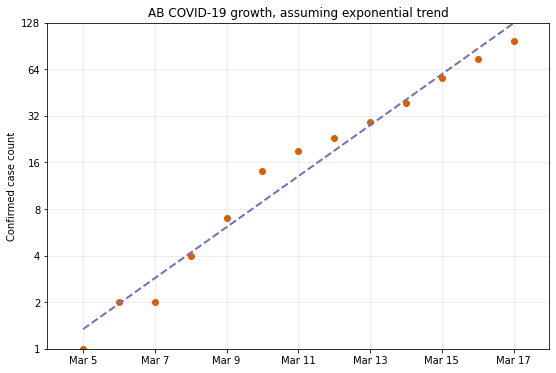

In [49]:
# Replicating Dr. Drang's plot from
# https://leancrew.com/all-this/2020/03/exponential-growth-and-log-scales/

# Add Required Data to Table
# --------------------------
# Extend the table with base-2 log of the case count
cases['Log2Count'] = np.log2(cases.Cumulative)

# We can only do the following date math if we imported the date as a data column
# Extend the table with the day number
firstDate = cases.Date[0]
cases['Days'] = (cases.Date - firstDate).dt.days

# Extend the table with the best exponential fit
from scipy.stats import linregress
lr = linregress(cases.Days, cases.Log2Count)
cases['Fit'] = 2 ** (lr.intercept + lr.slope * cases.Days)

print(cases)

# Construct Plot
# --------------
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,6))
plt.yscale('log', basey=2)
ax.plot(cases.Days, cases.Cumulative, 'o', color='#d95f02', lw=1)
ax.plot(cases.Days, cases.Fit, '--', color='#7570b3', lw=2)

# Determine ticks etc
from math import log2, ceil
yStart = 1
coordMax = log2(cases.Cumulative.max()/yStart)
expMax = ceil(coordMax)
yAdd = .4142*yStart*2**expMax if expMax - coordMax < .1 else 0
yMax = yStart * (2 ** expMax) + yAdd
plt.ylim(ymin=yStart, ymax=yMax)
majors = np.array([ yStart * 2 ** i for i in range(expMax+1) ])
ax.set_yticks(majors)
ax.set_yticklabels(majors)

from datetime import timedelta
dateTickFreq = 2
dMax = cases.Days.max()
xAdd = 2 if cases.Days.max() % dateTickFreq else 1
plt.xlim(xmin=-1, xmax=dMax + 1)
ax.set_xticks([ x for x in range(0, dMax+xAdd, dateTickFreq) ])
dates = [ (firstDate.date() + timedelta(days=x)).strftime('%b %-d') for x in range(0, dMax+xAdd, dateTickFreq)]
ax.set_xticklabels(dates)
ax.grid(linewidth=.5, which='major', color='#ddd', linestyle='-')


# Add labels/title
title = 'AB COVID-19 growth, assuming exponential trend'
plt.title(title)
plt.ylabel('Confirmed case count')

plt.show()
